### 1. Conectar ao banco e desenvolver as querys para obter os dados

#### Fazendo Download do zip

In [1]:
from urllib import request
file_url = 'https://s3.amazonaws.com/gerencianet-pub-prod-1/printscreen/2021/desafio-tecnico.zip'
file = 'desafio-tecnico.zip'
request.urlretrieve(file_url , file )

('desafio-tecnico.zip', <http.client.HTTPMessage at 0x2d578ca5490>)

#### Extraindo o zip

In [2]:
from zipfile import ZipFile
z = ZipFile(file, 'r')
z.extractall()
z.close()

#### Importando os dados do SQLite

In [3]:
import sqlite3
import pandas as pd
import numpy as np
con = sqlite3.connect("desafio-tecnico.db")

#### Função para trasformar tabelas SQLite em DataFrame pandas

In [4]:
def parse_to_df(table,database):
    con = sqlite3.connect(database)
    query = ''' SELECT * FROM '''+table
    df = pd.read_sql_query(query, con)
    return df

#### Transformar Tabela accounts em dataframe df_accounts

In [5]:
df_accounts = parse_to_df('accounts',"desafio-tecnico.db")

In [6]:
df_accounts.head()

,id,account_number,birth,occupation,email,address_id,created_at
0,1,155938,1984-10-29,Outros,mariaceciliaazevedo042@example.com,1,2021-04-01 02:30:00
1,2,747007,1977-03-26,Corretor,ananunes3@example.com,2,2021-04-01 02:00:00
2,3,208404,1984-01-26,Analista,luizfernandovieira@example.com,3,2021-04-01 11:30:00
3,4,66402,1982-06-30,Investidor,gabriellynascimento6@example.com,4,2021-04-01 14:30:00
4,5,277012,1967-01-11,Outros,aliciagoncalves7@example.com,5,2021-04-02 15:30:00


#### Transformar Tabela address em dataframe df_address

In [7]:
df_address = parse_to_df('address','desafio-tecnico.db')
df_address.head()

,id,state,city,created_at
0,1,RJ,Carmo,2021-04-01 02:30:00
1,2,MG,Bertopolis,2021-04-01 02:00:00
2,3,MG,Olaria,2021-04-01 11:30:00
3,4,PR,Icaraima,2021-04-01 14:30:00
4,5,ES,Ecoporanga,2021-04-02 15:30:00


#### Transformar Tabela levels em dataframe df_levels

In [8]:
df_levels = parse_to_df('levels','desafio-tecnico.db')
df_levels.head()

,id,account_number,level,created_at
0,1,155938,F,2021-04-20 08:00:00
1,2,747007,D,2021-04-19 19:30:00
2,4,66402,D,2021-04-28 21:00:00
3,5,277012,D,2021-04-19 12:00:00
4,6,228213,D,2021-04-26 15:00:00


In [9]:
df_levels.level.unique()

array(['F', 'D', 'C', 'A', 'B'], dtype=object)

In [10]:
df_levels.account_number.nunique()

926

#### Transformar Tabela charges em dataframe df_charges

In [11]:
df_charges = parse_to_df('charges','desafio-tecnico.db')
df_charges.head()

,id,account_number,status,value,created_at
0,1,155938,paid,11992,2021-04-01 03:00:00
1,2,155938,paid,9689,2021-04-01 13:30:00
2,3,155938,paid,11579,2021-04-01 11:30:00
3,4,747007,unpaid,3134,2021-04-02 12:00:00
4,5,747007,paid,3085,2021-04-02 19:00:00


#### Transformar Tabela transactions em dataframe df_transactions

In [12]:
df_transactions = parse_to_df('transactions','desafio-tecnico.db')
df_transactions.head()

,id,account_number,transaction_type_id,value,created_at
0,1,155938,1,11992,2021-04-01 03:00:00
1,2,155938,1,9689,2021-04-01 13:30:00
2,3,155938,1,11579,2021-04-01 11:30:00
3,4,155938,3,11168,2021-04-01 11:00:00
4,5,155938,3,10772,2021-04-01 21:00:00


#### Transformar Tabela df_transaction_type em dataframe df_df_transaction_type

In [13]:
df_transaction_type = parse_to_df('transaction_type','desafio-tecnico.db')
df_transaction_type.head()

,id,description,description_long
0,1,boleto_recebido,BOLETO RECEBIDO PELO CLIENTE
1,2,pix_enviado,PIX ENVIADO PELO CLIENTE PARA UMA CONTA EXTERNA
2,3,pix_recebido,PIX RECEBIDO PELO CLIENTE


- #### Juntando tabela de contas com os endereços

In [14]:
df_address['address_id'] = df_address['id']
df_accounts_with_address = pd.merge(df_accounts, df_address, how='left', on='address_id')
df_accounts_with_address.shape

(1029, 11)

- ##### Renomeando colunas para melhor compreenção

In [15]:
df_accounts_with_address.rename(columns={'id_x':'id_acc','id_y':'id_add','created_at_x':'created_at_acc'},inplace=True)

In [16]:
df_accounts_with_address.drop(columns=['created_at_y'], inplace=True)

In [17]:
df_accounts_with_address.head()

,id_acc,account_number,birth,occupation,email,address_id,created_at_acc,id_add,state,city
0,1,155938,1984-10-29,Outros,mariaceciliaazevedo042@example.com,1,2021-04-01 02:30:00,1,RJ,Carmo
1,2,747007,1977-03-26,Corretor,ananunes3@example.com,2,2021-04-01 02:00:00,2,MG,Bertopolis
2,3,208404,1984-01-26,Analista,luizfernandovieira@example.com,3,2021-04-01 11:30:00,3,MG,Olaria
3,4,66402,1982-06-30,Investidor,gabriellynascimento6@example.com,4,2021-04-01 14:30:00,4,PR,Icaraima
4,5,277012,1967-01-11,Outros,aliciagoncalves7@example.com,5,2021-04-02 15:30:00,5,ES,Ecoporanga


#### Juntar Tabela de contas/endereço com a Tabela de levels

In [18]:
df_accounts_with_address_levels = pd.merge(df_accounts_with_address, df_levels, how='left', on='account_number')
df_accounts_with_address_levels.shape

(1029, 13)

In [19]:
df_accounts_with_address_levels.drop(columns=['created_at'],inplace=True)
df_accounts_with_address_levels

,id_acc,account_number,birth,occupation,email,address_id,created_at_acc,id_add,state,city,id,level
0,1,155938,1984-10-29,Outros,mariaceciliaazevedo042@example.com,1,2021-04-01 02:30:00,1,RJ,Carmo,1.0,F
1,2,747007,1977-03-26,Corretor,ananunes3@example.com,2,2021-04-01 02:00:00,2,MG,Bertopolis,2.0,D
2,3,208404,1984-01-26,Analista,luizfernandovieira@example.com,3,2021-04-01 11:30:00,3,MG,Olaria,NaN,NaN
3,4,66402,1982-06-30,Investidor,gabriellynascimento6@example.com,4,2021-04-01 14:30:00,4,PR,Icaraima,4.0,D
4,5,277012,1967-01-11,Outros,aliciagoncalves7@example.com,5,2021-04-02 15:30:00,5,ES,Ecoporanga,5.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...
1024,1025,385922,2003-05-20,Analista,evelynviana3@example.com,745,2021-07-10 03:30:00,745,GO,Monte Alegre de Goias,1025.0,D
1025,1026,37393,1996-01-20,Investidor,anaclaraporto9@example.com,505,2021-07-10 04:30:00,505,PR,Paraiso do Norte,1026.0,C
1026,1027,714025,1981-07-21,Corretor,miguelribeiro3@example.com,746,2021-07-10 15:00:00,746,GO,Sao Luis de Montes Belos,1027.0,D
1027,1028,708615,1967-03-14,Corretor,mariaeduardadarocha@example.com,747,2021-07-10 21:30:00,747,SC,Zortea,1028.0,D


#### Inserindo a informação de charges:
- #### criação de variavel paid (Contém a qtd de boletos que foram pagos) 
- #### e unpaid (Contém a qtd de boletos não pagos)

In [20]:
df_charges_group = df_charges.groupby(['account_number','status']).count().reset_index()[['account_number','status','value']]
df_charges_group = df_charges_group.pivot(index="account_number", columns="status", values="value").reset_index().fillna(0)
df_charges_group

status,account_number,paid,unpaid
0,2711,144.0,75.0
1,2763,128.0,95.0
2,2957,32.0,30.0
3,3478,18.0,18.0
4,5561,26.0,40.0
...,...,...,...
875,995447,136.0,138.0
876,997838,23.0,70.0
877,998364,110.0,25.0
878,998440,25.0,19.0


- ##### Juntando atraves de join a informação de df_charges_group com df_accounts_with_address_levels

In [21]:
df_accounts_with_address_levels_charges = pd.merge(df_accounts_with_address_levels, df_charges_group, how='left', on='account_number')
print(df_accounts_with_address_levels_charges.shape)
df_accounts_with_address_levels_charges.head()

(1029, 14)


,id_acc,account_number,birth,occupation,email,address_id,created_at_acc,id_add,state,city,id,level,paid,unpaid
0,1,155938,1984-10-29,Outros,mariaceciliaazevedo042@example.com,1,2021-04-01 02:30:00,1,RJ,Carmo,1.0,F,30.0,39.0
1,2,747007,1977-03-26,Corretor,ananunes3@example.com,2,2021-04-01 02:00:00,2,MG,Bertopolis,2.0,D,113.0,153.0
2,3,208404,1984-01-26,Analista,luizfernandovieira@example.com,3,2021-04-01 11:30:00,3,MG,Olaria,NaN,NaN,64.0,79.0
3,4,66402,1982-06-30,Investidor,gabriellynascimento6@example.com,4,2021-04-01 14:30:00,4,PR,Icaraima,4.0,D,184.0,33.0
4,5,277012,1967-01-11,Outros,aliciagoncalves7@example.com,5,2021-04-02 15:30:00,5,ES,Ecoporanga,5.0,D,90.0,112.0


- ##### Preenchendo os NaN de paid e unpaid com 0.

In [22]:
df_accounts_with_address_levels_charges[['paid','unpaid']].info()
print(f"-"*40)
print(f":::> Quantidade de NaN em paid e unpaid")
df_accounts_with_address_levels_charges[['paid','unpaid']].isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 0 to 1028
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   paid    880 non-null    float64
 1   unpaid  880 non-null    float64
dtypes: float64(2)
memory usage: 24.1 KB
----------------------------------------
:::> Quantidade de NaN em paid e unpaid


paid      149
unpaid    149
dtype: int64

- ##### Preenchendo os NaN de charger com 0

In [23]:
df_accounts_with_address_levels_charges['paid'].fillna(0, inplace=True)
df_accounts_with_address_levels_charges['unpaid'].fillna(0, inplace=True)

- ##### Convertendo as colunas paid e unpaid em inteiro

In [24]:
df_accounts_with_address_levels_charges['paid'] = df_accounts_with_address_levels_charges['paid'].astype(int)
df_accounts_with_address_levels_charges['unpaid'] = df_accounts_with_address_levels_charges['unpaid'].astype(int)

In [25]:
df_accounts_with_address_levels_charges.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 0 to 1028
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_acc          1029 non-null   int64  
 1   account_number  1029 non-null   int64  
 2   birth           1029 non-null   object 
 3   occupation      1029 non-null   object 
 4   email           1029 non-null   object 
 5   address_id      1029 non-null   int64  
 6   created_at_acc  1029 non-null   object 
 7   id_add          1029 non-null   int64  
 8   state           1029 non-null   object 
 9   city            1029 non-null   object 
 10  id              926 non-null    float64
 11  level           926 non-null    object 
 12  paid            1029 non-null   int32  
 13  unpaid          1029 non-null   int32  
dtypes: float64(1), int32(2), int64(4), object(7)
memory usage: 112.5+ KB


#### Inserindo informação de level para uma nova variavel como sendo licita (0) ou ilicita (1), sendo A,B,C e D = licita e F = ilicita

In [26]:
df_accounts_with_address_levels_charges['target'] = df_accounts_with_address_levels_charges['level'].map({'A':0,'B':0,'C':0,'D':0,'F':1}, na_action='ignore')

##### Convertendo account_number para object

In [27]:
df_accounts_with_address_levels_charges['account_number'] = df_accounts_with_address_levels_charges['account_number'].astype(str)

In [28]:
#### Deletando variaveis e Dataframes que não estão sendo usado
del df_accounts, df_accounts_with_address, df_accounts_with_address_levels, df_address, df_charges, df_charges_group,df_levels
del df_transaction_type, df_transactions

In [29]:
#dir()

### 2. Descritiva do Dataset com os merges(join)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
df_accounts_with_address_levels_charges.describe()

,id_acc,address_id,id_add,id,paid,unpaid,target
count,1029.000000,1029.000000,1029.000000,926.000000,1029.000000,1029.000000,926.000000
mean,515.000000,340.163265,340.163265,518.062635,94.059281,56.056365,0.220302
std,297.191016,213.681298,213.681298,297.499508,99.035757,58.770052,0.414674
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,258.000000,148.000000,148.000000,259.250000,20.000000,20.000000,0.000000
50%,515.000000,328.000000,328.000000,522.500000,78.000000,42.000000,0.000000
75%,772.000000,518.000000,518.000000,772.750000,134.000000,77.000000,0.000000
max,1029.000000,747.000000,747.000000,1029.000000,764.000000,534.000000,1.000000


In [32]:
df_accounts_with_address_levels_charges.tail()

,id_acc,account_number,birth,occupation,email,address_id,created_at_acc,id_add,state,city,id,level,paid,unpaid,target
1024,1025,385922,2003-05-20,Analista,evelynviana3@example.com,745,2021-07-10 03:30:00,745,GO,Monte Alegre de Goias,1025.0,D,0,0,0.0
1025,1026,37393,1996-01-20,Investidor,anaclaraporto9@example.com,505,2021-07-10 04:30:00,505,PR,Paraiso do Norte,1026.0,C,0,0,0.0
1026,1027,714025,1981-07-21,Corretor,miguelribeiro3@example.com,746,2021-07-10 15:00:00,746,GO,Sao Luis de Montes Belos,1027.0,D,0,0,0.0
1027,1028,708615,1967-03-14,Corretor,mariaeduardadarocha@example.com,747,2021-07-10 21:30:00,747,SC,Zortea,1028.0,D,0,0,0.0
1028,1029,418641,1992-06-10,Corretor,heitordaluz@example.com,12,2021-07-10 02:00:00,12,RJ,Italva,1029.0,F,1,0,1.0


- ##### Visualizando boletos pagos e não pagos por estado

In [33]:
df_paid_unpaid_to_state = df_accounts_with_address_levels_charges.groupby(['state']).sum().reset_index()[['state','paid','unpaid']]
df_paid_unpaid_to_state

,state,paid,unpaid
0,BA,5311,2508
1,ES,11736,7234
2,GO,4801,2635
3,MG,33597,19057
4,PR,14903,11264
5,RJ,14503,9824
6,SC,6170,2403
7,SP,5766,2757


In [34]:
data_plot = df_paid_unpaid_to_state[['state','unpaid']].sort_values('unpaid',ascending=False)

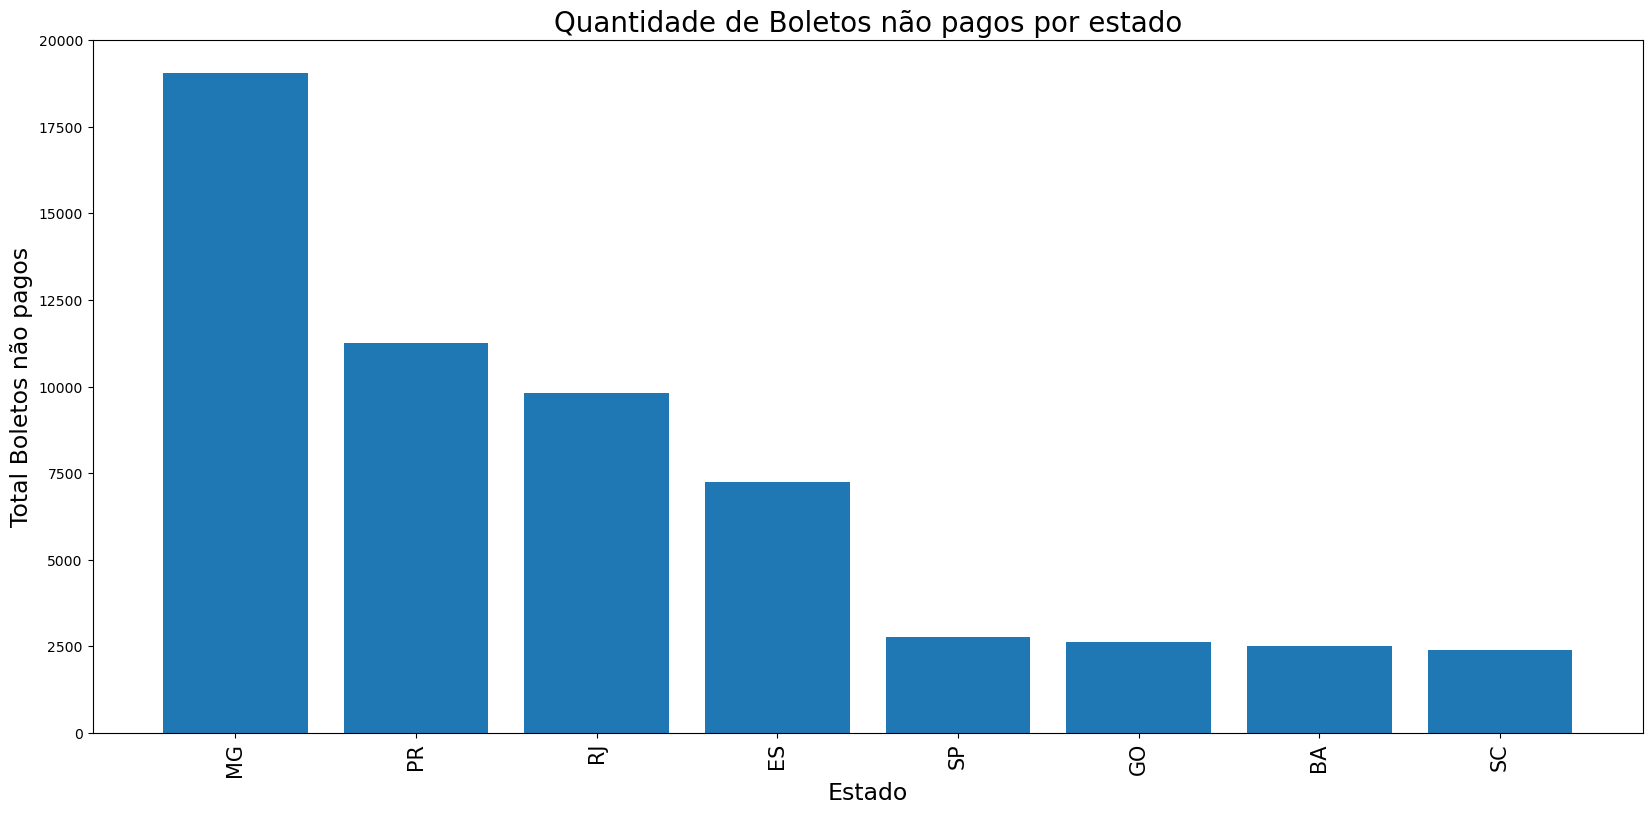

In [35]:
f,ax = plt.subplots(figsize=(20,9))

data_plot = df_paid_unpaid_to_state[['state','unpaid']].sort_values('unpaid',ascending=False)

ax.bar(data_plot['state'],data_plot['unpaid'])
ax.set_xticklabels(data_plot['state'].values,rotation=90,fontsize='15')
ax.set_xlabel('Estado',fontsize='17')
ax.set_ylabel('Total Boletos não pagos',fontsize='17')
ax.set_title('Quantidade de Boletos não pagos por estado',fontsize='20')
plt.show()

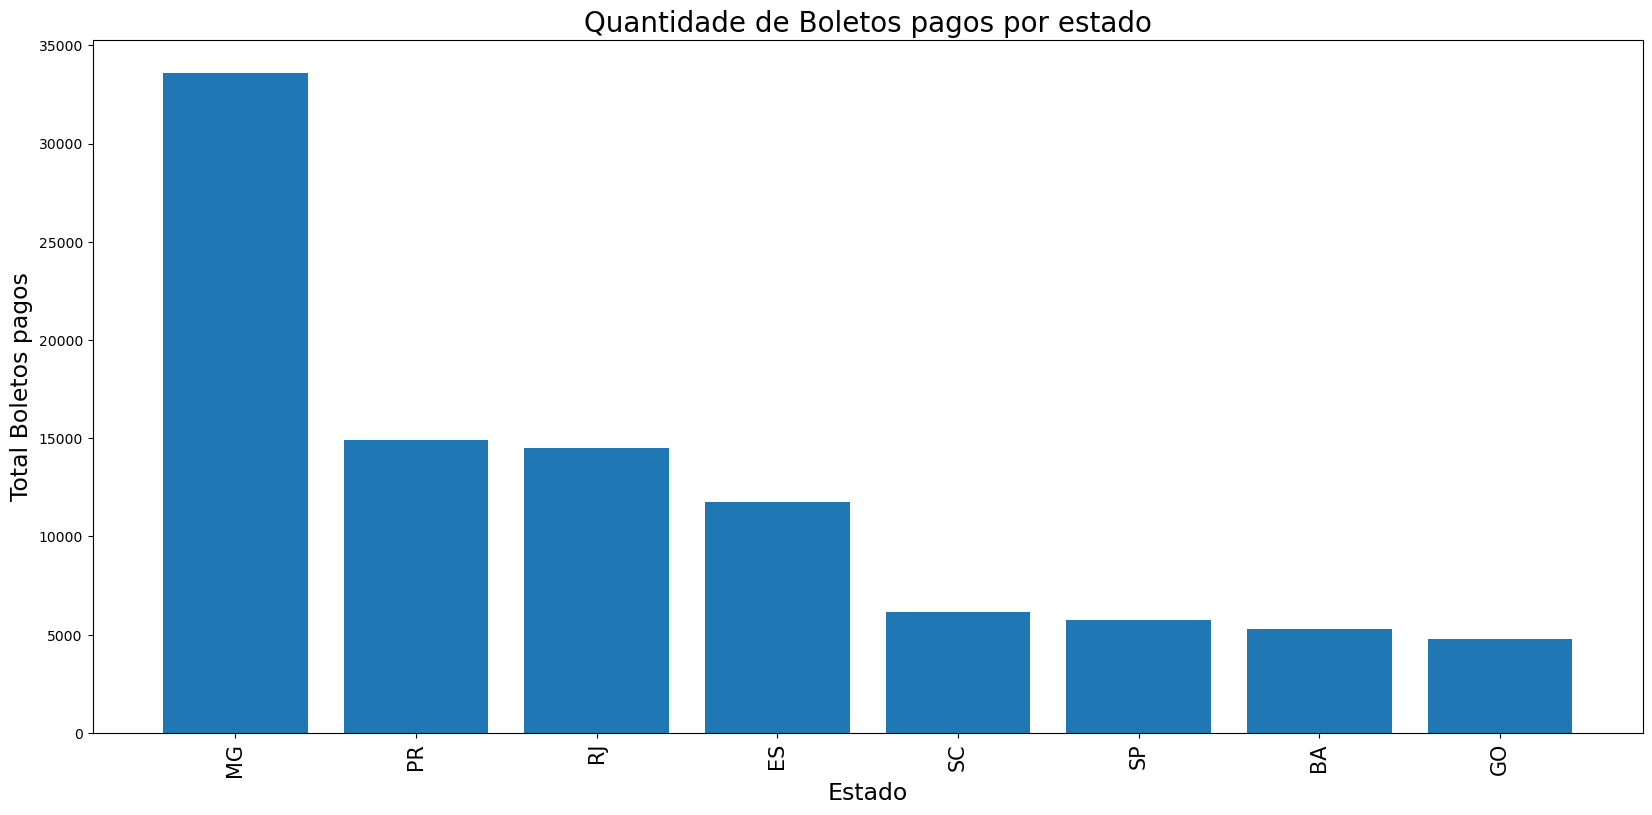

In [36]:
f,ax = plt.subplots(figsize=(20,9))

data_plot = df_paid_unpaid_to_state[['state','paid']].sort_values('paid',ascending=False)

ax.bar(data_plot['state'],data_plot['paid'])
ax.set_xticklabels(data_plot['state'].values,rotation=90,fontsize='15')
ax.set_xlabel('Estado',fontsize='17')
ax.set_ylabel('Total Boletos pagos',fontsize='17')
ax.set_title('Quantidade de Boletos pagos por estado',fontsize='20')
plt.show()

- ##### Vizualizando as contas que tem mais boletos não pagos

In [37]:
acc_largest_unpaid = df_accounts_with_address_levels_charges[['account_number','state','unpaid']].groupby(['account_number','state']).sum().reset_index()
acc_largest_unpaid.nlargest(10,'unpaid')

,account_number,state,unpaid
153,253345,MG,534
355,422360,MG,463
116,221895,MG,437
220,309054,RJ,385
275,355091,ES,356
630,662383,RJ,352
230,317265,RJ,313
912,911353,PR,313
60,164397,MG,305
746,76284,MG,291


#### OBS: Vemos que dentre as 10 contas que mais tem boletos não pagos 50% são de MG confirmando o mesmo como estado de maior inadimplencia

* #### Feature engening - Criando coluna de birth_year (ano do nascimento) e age_creation (Idade que o cliente tinha na criação da conta)

In [38]:
from datetime import *
df_accounts_with_address_levels_charges['birth'] = pd.to_datetime(df_accounts_with_address_levels_charges.birth)
df_accounts_with_address_levels_charges['created_at_acc'] = pd.to_datetime(df_accounts_with_address_levels_charges['created_at_acc'])
df_accounts_with_address_levels_charges['birth_year'] = df_accounts_with_address_levels_charges['birth'].dt.year
df_accounts_with_address_levels_charges['age_creation'] = (abs((df_accounts_with_address_levels_charges['birth'] - df_accounts_with_address_levels_charges['created_at_acc']))/timedelta(days=365)).astype(int)

In [39]:
df_accounts_with_address_levels_charges.columns

Index(['id_acc', 'account_number', 'birth', 'occupation', 'email',
       'address_id', 'created_at_acc', 'id_add', 'state', 'city', 'id',
       'level', 'paid', 'unpaid', 'target', 'birth_year', 'age_creation'],
      dtype='object')

* #### Deletando colunas que não serão usadas no modelo

In [40]:
df_accounts_with_address_levels_charges.drop(columns=['id_acc','birth','email','address_id','created_at_acc','id_add','id','level'], inplace=True)

- #### Separando os dados classificados dos não classificados em levels

In [41]:
dados_classificados = df_accounts_with_address_levels_charges.query('target.notna()')

In [42]:
dados_classificados.shape

(926, 9)

In [43]:
dados_nao_classificados = df_accounts_with_address_levels_charges.query('target.isna()').drop(columns=['target'])

In [44]:
dados_nao_classificados.shape

(103, 8)

- ##### Deletando os dataframes sem uso

In [45]:
del df_accounts_with_address_levels_charges, df_paid_unpaid_to_state

#### Balanceamento de classes

   - ##### Distribuição dos dados antes de balancear

<AxesSubplot:xlabel='target', ylabel='count'>

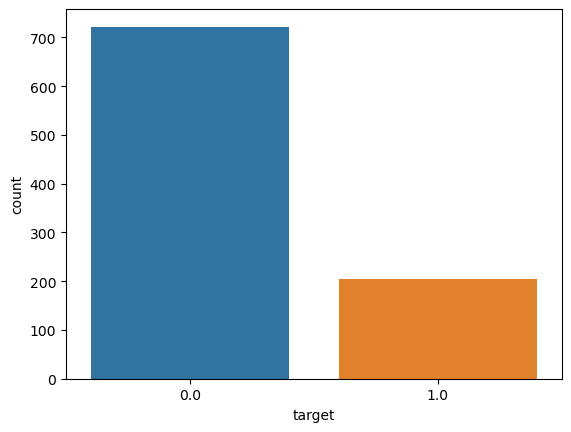

In [46]:
sns.countplot(x=dados_classificados['target'])

In [47]:
X = dados_classificados.drop(columns=['target'])
y = dados_classificados['target']

In [48]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Random Oversampler
ros = RandomOverSampler(random_state = 32)
X_ros_res, y_ros_res = ros.fit_resample(X, y)

In [49]:
df_balanceado = X_ros_res
df_balanceado['target'] = y_ros_res.astype(int)

   - ##### Distribuição dos dados depois de balancear

<AxesSubplot:xlabel='target', ylabel='count'>

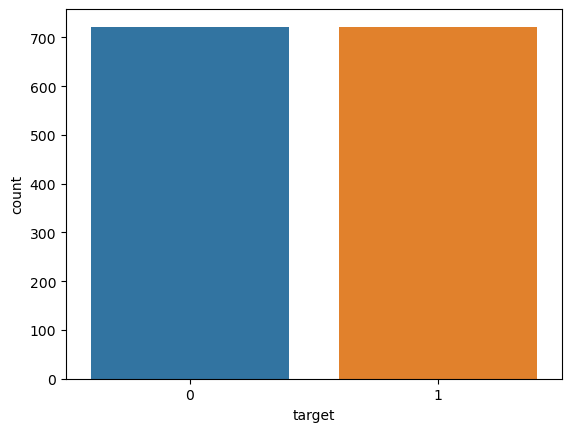

In [50]:
sns.countplot(x=df_balanceado['target'])

In [51]:
df_balanceado.target.value_counts()

1    722
0    722
Name: target, dtype: int64

- #### Preparação dos dados para o modelo
    - ##### OBS: O processo de separação de treino e teste sera feito po AutoML no Pycaret, temos os dados ja separados também em dados_classificados e dados_nao_classificados, o dataframe de dados_classificados passou por balanceamento retornando o dataset df_balanceado.

In [52]:
# Dados com Classificação levels
df_balanceado

,account_number,occupation,state,city,paid,unpaid,birth_year,age_creation,target
0,155938,Outros,RJ,Carmo,30,39,1984,36,1
1,747007,Corretor,MG,Bertopolis,113,153,1977,44,0
2,66402,Investidor,PR,Icaraima,184,33,1982,38,0
3,277012,Outros,ES,Ecoporanga,90,112,1967,54,0
4,228213,Analista,BA,Gaviao,0,0,1983,37,0
...,...,...,...,...,...,...,...,...,...
1439,547300,Corretor,PR,Cruz Machado,69,41,1988,32,1
1440,92447,Autonomo,RJ,Barra Mansa,34,57,1990,30,1
1441,58587,Outros,PR,Cruzeiro do Iguacu,79,73,1989,31,1
1442,297081,Autonomo,PR,Palmeira,0,0,1995,26,1


In [53]:
# Dados sem a  Classificação em levels
dados_nao_classificados

,account_number,occupation,state,city,paid,unpaid,birth_year,age_creation
2,208404,Analista,MG,Olaria,64,79,1984,37
6,108762,Analista,ES,Cachoeiro de Itapemirim,167,42,1982,38
7,309054,Desenvolvedor,RJ,Mesquita,350,385,1990,31
8,89836,Investidor,PR,Marechal Candido Rondon,482,190,1981,39
51,900180,Corretor,MG,Claudio,128,75,1980,40
...,...,...,...,...,...,...,...,...
977,905598,Autonomo,SP,Ituverava,27,9,1993,27
978,886210,Desenvolvedor,MG,Morro do Pilar,0,0,1967,54
993,583343,Analista,MG,Baldim,11,10,1973,47
1008,81888,Outros,PR,Brasilandia do Sul,2,6,1976,45


### 3. Desenvolvimento do modelo para classificar as contas em lícitas (0) ou ilícitas (1) utilizando pycaret AutoML com metrica de accuracia e observando a precisão junto com ROC para evitar overfit

- #### Utilizando AutoML com pycarat, Treinar, testar, ajustar, avaliar e tunar

In [54]:
#!pip install --user PyQt5

In [55]:
#!pip install --pre pycaret

In [57]:
from pycaret.classification import *

In [58]:
s = setup(data = df_balanceado, target = 'target')

,Description,Value
0,Session id,5078
1,Target,target
2,Target type,Binary
3,Original data shape,"(1444, 9)"
4,Transformed data shape,"(1444, 9)"
5,Transformed train set shape,"(1010, 9)"
6,Transformed test set shape,"(434, 9)"
7,Numeric features,4
8,Categorical features,4
9,Preprocess,True


In [59]:
best = s.compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9634,0.9934,0.9445,0.9823,0.9627,0.9267,0.9279,0.1020
rf,Random Forest Classifier,0.9584,0.9947,0.9307,0.9853,0.9570,0.9168,0.9186,0.0990
gbc,Gradient Boosting Classifier,0.9386,0.9814,0.9503,0.9296,0.9394,0.8772,0.8784,0.0780
lr,Logistic Regression,0.8990,0.9827,0.8318,0.9624,0.8914,0.7981,0.8068,0.9080
dt,Decision Tree Classifier,0.8970,0.8970,0.9386,0.8702,0.9013,0.7940,0.8004,0.0420
knn,K Neighbors Classifier,0.8950,0.9507,0.9309,0.8694,0.8987,0.7901,0.7928,0.0540
ada,Ada Boost Classifier,0.8921,0.9715,0.9247,0.8709,0.8959,0.7842,0.7878,0.0690
lightgbm,Light Gradient Boosting Machine,0.8644,0.9762,0.9208,0.8294,0.8718,0.7288,0.7352,0.2180
nb,Naive Bayes,0.8089,0.9804,0.6177,1.0000,0.7626,0.6177,0.6687,0.0450
ridge,Ridge Classifier,0.7901,0.0000,0.5799,1.0000,0.7331,0.5800,0.6392,0.0300


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [60]:
best

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=5078, verbose=0, warm_start=False)

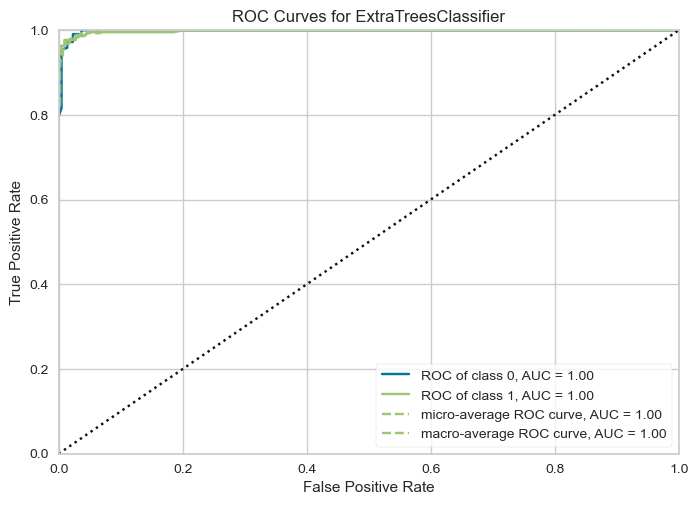

In [65]:
plot_model(best)

- #### OBS: O modelo best 'et' de acordo com a AUC/ROC de 1 é suspeito e pode indicar Overfiting

In [67]:
from pycaret.classification import ClassificationExperiment
exp1 = ClassificationExperiment()

In [68]:
exp1.setup(df_balanceado, target = 'target')

,Description,Value
0,Session id,5707
1,Target,target
2,Target type,Binary
3,Original data shape,"(1444, 9)"
4,Transformed data shape,"(1444, 9)"
5,Transformed train set shape,"(1010, 9)"
6,Transformed test set shape,"(434, 9)"
7,Numeric features,4
8,Categorical features,4
9,Preprocess,True


In [ ]:
#dir(exp1)

- ##### Teste de Experimentação para ver se o modelo rf realmente é o melhor

In [69]:
exp1.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9624,0.9926,0.9463,0.9785,0.9614,0.9247,0.9264,0.0910
rf,Random Forest Classifier,0.9604,0.9936,0.9404,0.9799,0.9592,0.9208,0.9223,0.1080
gbc,Gradient Boosting Classifier,0.9119,0.9777,0.9423,0.8901,0.9146,0.8237,0.8272,0.0770
lr,Logistic Regression,0.9050,0.9825,0.8412,0.9643,0.8969,0.8098,0.8182,0.8570
knn,K Neighbors Classifier,0.9000,0.9516,0.9446,0.8691,0.9046,0.8000,0.8045,0.0560
ada,Ada Boost Classifier,0.8950,0.9787,0.9265,0.8752,0.8989,0.7900,0.7939,0.0760
lightgbm,Light Gradient Boosting Machine,0.8911,0.9824,0.9126,0.8780,0.8938,0.7821,0.7851,0.2210
dt,Decision Tree Classifier,0.8782,0.8781,0.9267,0.8478,0.8844,0.7563,0.7621,0.0450
nb,Naive Bayes,0.8099,0.9827,0.6196,1.0000,0.7637,0.6197,0.6703,0.0440
ridge,Ridge Classifier,0.8050,0.0000,0.6098,1.0000,0.7561,0.6098,0.6626,0.0340


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=5707, verbose=0, warm_start=False)

- ##### Criação do modelo escolhido com melhor avaliação sem uma suspeita de overfiting

In [70]:
model = create_model(estimator='rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9505,0.9818,0.9020,1.0000,0.9485,0.9011,0.9055
1,0.9406,0.9906,0.9216,0.9592,0.9400,0.8812,0.8819
2,0.9901,0.9996,0.9804,1.0000,0.9901,0.9802,0.9804
3,0.9406,0.9927,0.9020,0.9787,0.9388,0.8813,0.8840
4,0.9802,1.0000,0.9608,1.0000,0.9800,0.9604,0.9612
5,0.9109,0.9890,0.8600,0.9556,0.9053,0.8216,0.8257
6,0.9802,0.9984,0.9600,1.0000,0.9796,0.9604,0.9611
7,0.9802,1.0000,0.9600,1.0000,0.9796,0.9604,0.9611
8,0.9604,0.9996,0.9200,1.0000,0.9583,0.9207,0.9236


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

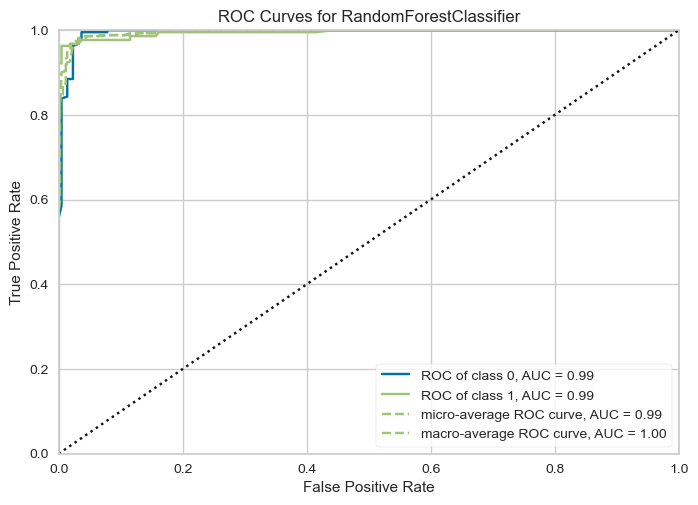

In [71]:
plot_model(model)

- ##### Tuning do modelo

In [73]:
rf_tuned = tune_model(model)
rf_tuned

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9505,0.9859,0.9020,1.0000,0.9485,0.9011,0.9055
1,0.9703,0.9922,0.9608,0.9800,0.9703,0.9406,0.9408
2,0.9901,0.9988,0.9804,1.0000,0.9901,0.9802,0.9804
3,0.9307,0.9906,0.8824,0.9783,0.9278,0.8615,0.8658
4,0.9901,0.9992,1.0000,0.9808,0.9903,0.9802,0.9804
5,0.9208,0.9894,0.8600,0.9773,0.9149,0.8414,0.8474
6,0.9802,0.9976,0.9600,1.0000,0.9796,0.9604,0.9611
7,0.9703,1.0000,0.9400,1.0000,0.9691,0.9406,0.9422
8,0.9901,1.0000,0.9800,1.0000,0.9899,0.9802,0.9804


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=11, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0001,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=220,
                       n_jobs=-1, oob_score=False, random_state=5078, verbose=0,
                       warm_start=False)

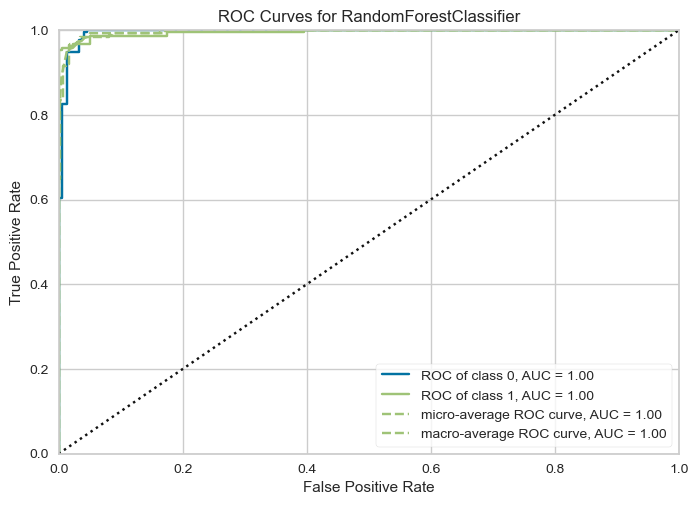

In [74]:
plot_model(rf_tuned)

#### OBS: O modelo tunado apresentou apresentou melhora no desempenho mas como a diferença e pouco e pode levar a uma suspeita de overfiting permanecemos então com o modelo padrao o model.

##### Proceguir como modelo sem tuning

In [75]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=5078, verbose=0, warm_start=False)

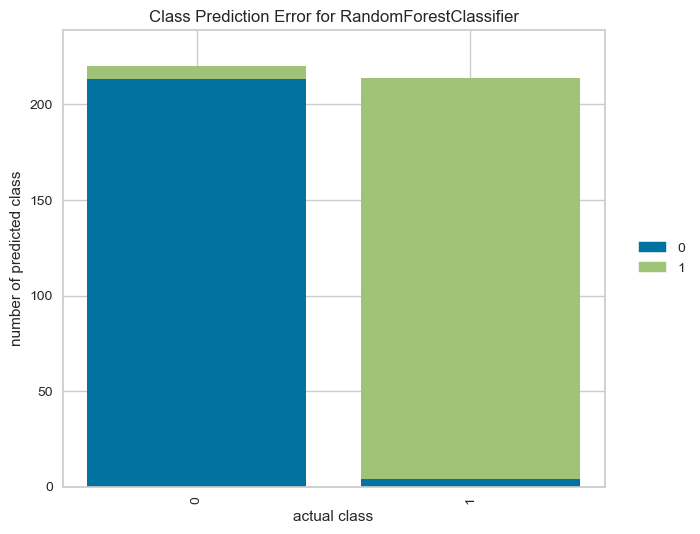

In [76]:
# Comparar predições e resultados do banco de teste
plot_model(model, plot='error')

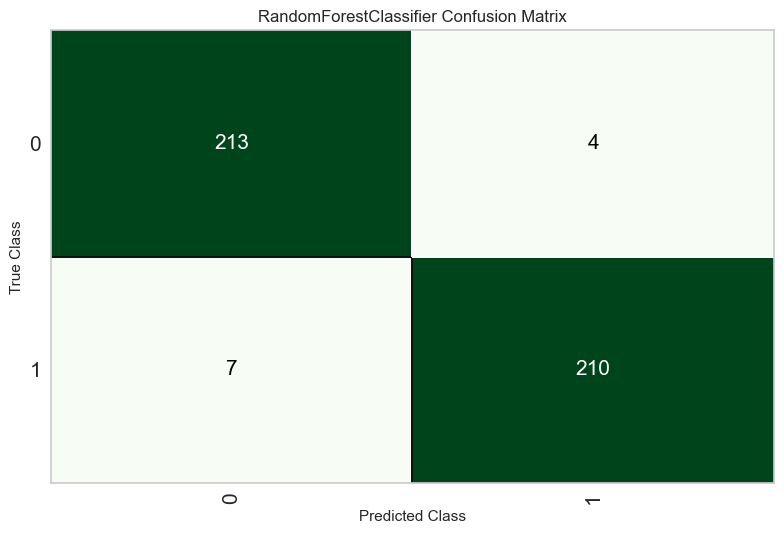

In [77]:
# Matrix de Confusão
plot_model(model, plot='confusion_matrix')

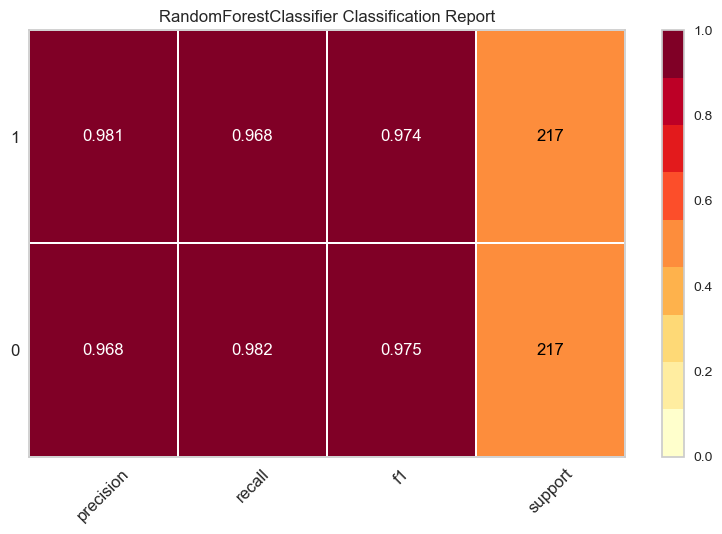

In [78]:
# Matrix de Confusão
plot_model(model, plot='class_report')

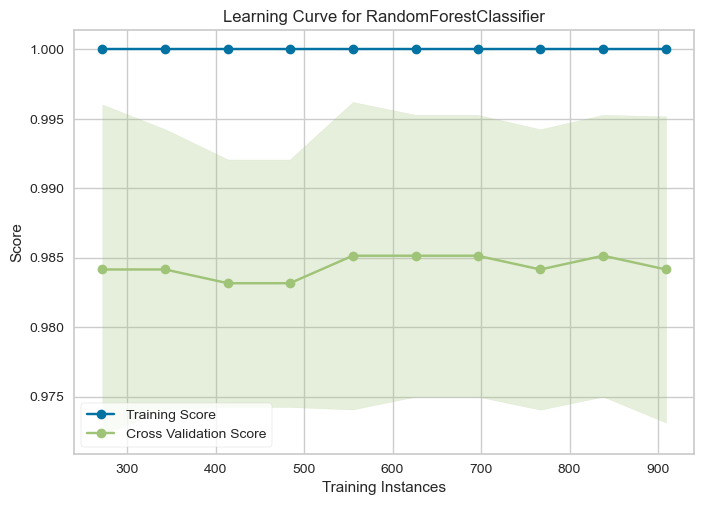

In [79]:
# Matrix de Confusão
plot_model(model, plot='learning')

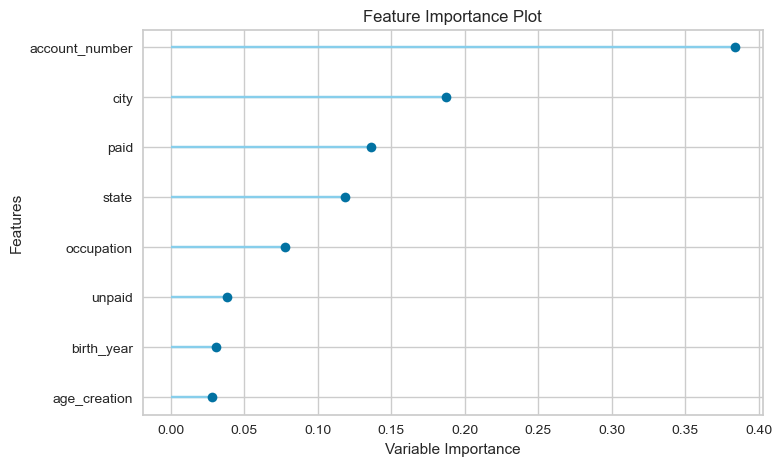

In [80]:
plot_model(model, 'feature')

#### Salvar o modelo

- ##### Efetuar predição sobre os dados sem classificação em level

In [81]:
mdl_rf = predict_model(model, data=dados_nao_classificados)

In [82]:
mdl_rf

,account_number,occupation,state,city,paid,unpaid,birth_year,age_creation,prediction_label,prediction_score
0,0.5,0.135294,0.171171,1.0,64.0,79.0,1984.0,37.0,0,0.86
1,0.5,0.135294,0.491525,0.5,167.0,42.0,1982.0,38.0,0,0.99
2,0.5,0.189024,0.692308,1.0,350.0,385.0,1990.0,31.0,0,0.94
3,0.5,0.675325,0.786350,0.5,482.0,190.0,1981.0,39.0,0,0.76
4,0.5,0.465347,0.171171,0.5,128.0,75.0,1980.0,40.0,0,1.00
...,...,...,...,...,...,...,...,...,...,...
98,0.5,0.797753,0.000000,0.5,27.0,9.0,1993.0,27.0,0,0.84
99,0.5,0.189024,0.171171,0.5,0.0,0.0,1967.0,54.0,0,1.00
100,0.5,0.135294,0.171171,0.5,11.0,10.0,1973.0,47.0,0,0.99
101,0.5,0.787879,0.786350,0.5,2.0,6.0,1976.0,45.0,0,0.79


In [83]:
dados_nao_classificados.reset_index(drop=True, inplace=True)

In [84]:
dados_nao_classificados['fraud'] = mdl_rf.prediction_label.astype(int)
dados_nao_classificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   account_number  103 non-null    object
 1   occupation      103 non-null    object
 2   state           103 non-null    object
 3   city            103 non-null    object
 4   paid            103 non-null    int32 
 5   unpaid          103 non-null    int32 
 6   birth_year      103 non-null    int64 
 7   age_creation    103 non-null    int32 
 8   fraud           103 non-null    int32 
dtypes: int32(4), int64(1), object(4)
memory usage: 5.8+ KB


In [85]:
dados_nao_classificados

,account_number,occupation,state,city,paid,unpaid,birth_year,age_creation,fraud
0,208404,Analista,MG,Olaria,64,79,1984,37,0
1,108762,Analista,ES,Cachoeiro de Itapemirim,167,42,1982,38,0
2,309054,Desenvolvedor,RJ,Mesquita,350,385,1990,31,0
3,89836,Investidor,PR,Marechal Candido Rondon,482,190,1981,39,0
4,900180,Corretor,MG,Claudio,128,75,1980,40,0
...,...,...,...,...,...,...,...,...,...
98,905598,Autonomo,SP,Ituverava,27,9,1993,27,0
99,886210,Desenvolvedor,MG,Morro do Pilar,0,0,1967,54,0
100,583343,Analista,MG,Baldim,11,10,1973,47,0
101,81888,Outros,PR,Brasilandia do Sul,2,6,1976,45,0


- ##### Visualizando qtd de previsoes das classes

<AxesSubplot:xlabel='prediction_label', ylabel='count'>

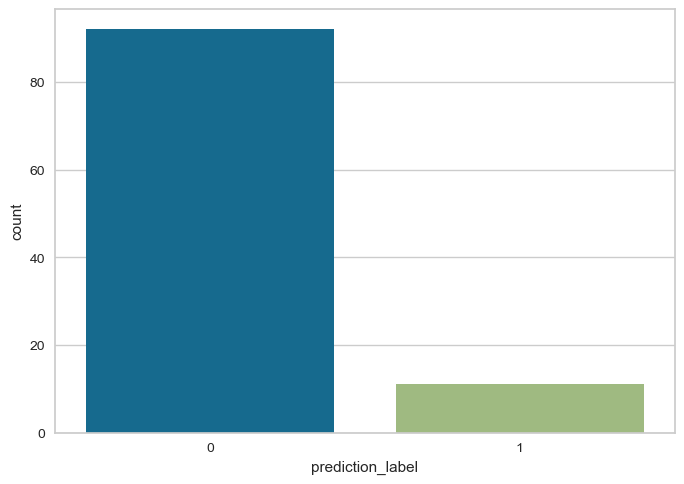

In [88]:
sns.countplot(x=mdl_rf['prediction_label'])

In [89]:
mdl_rf.prediction_label.value_counts()

0    92
1    11
Name: prediction_label, dtype: int64

In [90]:
# Finalize model
final_rf = finalize_model(model)

- ##### Salvando o modelo para usar no Deploy com API Flask

In [91]:
# Save Model
save_model(model, 'my_rf_pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\Fabio\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['paid', 'unpaid', 'birth_year',
                                              'age_creation'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  Transfor...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, c

### 4. DEPLOY - Disponibilizar a classificação obtida pelo modelo das contas presentes no banco que não possuem classificação na tabela levels, em duas formas de Deply:
   - #### Opção 1 - Deploy com API Flask.
   - #### Opção 2 - Deploy com arquivo CSV [account_number e fraud].

- ##### Deploy Opção 2 - CSV
    - ##### Gerar um csv com as colunas account_number e fraud. Sendo que a coluna fraud deve ter os seguintes valores: 0 para contas lícitas e 1 para ilícitas

In [92]:
# Filtrando apenas as colunas desejadas a coluna fraud esta preencgida pelo model_pedict()
dados_nao_classificados[['account_number','fraud']].to_csv("deploy.csv", index=False)

- #### Gerando um JSON dos dados não classificados para Deploy na API Flask
    - #### Opção 1: Deploy de uma API que disponibiliza um endpoit GET que recebe como parâmetro na URL o número da conta e retorna o valor 0 para conta que o modelo considere lícita e 1 caso o modelo considere ilícita. A rota deve seguir a seguinte estrutura: URL/?account_number=12345
    - #### Exemplo do endpoint da API http://localhost:5000/?account_number=309054, o arquivo da API Flask esta com nome->app.py para execupar basta utilizar o cmd do conda por exemplo e digitar python app.py

In [94]:
data = dados_nao_classificados.drop(columns=['fraud'])
data.to_json('data.json',orient= 'records', index=True)

#### Bibliotecas necessarias para API

In [ ]:
#!pip install Flask
#!pip install uvicorn
#!pip install pickle5
#!pip install pydantic
#!pip install scikit-learn
#!pip install requests
#!pip install pypi-json
#!pip install joblib
#!pip install json

- #### OBS: Este projeto finalizado também esta disponivel no meu GITHUN :> https://github.com/franciscofabio/DESAFIO_GERENCIANET